In [2]:
from astropy.table import QTable
import pylab as pl
pl.ion()
import numpy as np
from scipy import interpolate
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
diag_plot = True

In [3]:
####read in data files........
talpha=QTable.read('../sim_fits/alphas_1mJy_central_source.fits')
tSync=QTable.read('../sim_fits/central_source_alpha=-0.7.fits') #plot 5a, blue line Simon's paper
tDust=QTable.read('../sim_fits/central_source_alpha=3.5.fits') #plot 5a, red line Simon's paper
tOffset_Sync=QTable.read('../sim_fits/offset_1mJy_alpha=-0.7.fits') #plot 5b Simon's paper
tOffset_Dust=QTable.read('../sim_fits/offset_1mJy_alpha=3.5.fits')#plot 5b Simon's paper
o0p1=QTable.read('../sim_fits/offset_0.2-mJy_alpha=0.1.fits') 
o0p7=QTable.read('../sim_fits/offset_0.2-mJy_alpha=-0.7.fits')
o3p5=QTable.read('../sim_fits/offset_0.2-mJy_alpha=3.5.fits')

In [4]:
#############################################################################
#Bin simulations

d3p5=np.unique(o3p5['offset_arcsec']) #get unique distances from center of cluster 
r3p5=np.zeros(len(d3p5))
i3p5=np.zeros(len(d3p5))
for i in range(len(d3p5)):
    p=np.where((o3p5['offset_arcsec'] == d3p5[i])) #filter table by this distance
    r3p5[i]=np.median(o3p5['srcinj_fixed_y_c'][p]-o3p5['fixed_y_c'][p]) #return median delta y
    i3p5[i]=stats.iqr((o3p5['srcinj_fixed_y_c'][p]-o3p5['fixed_y_c'][p]),rng=(16.,84.)) / 2.   #return interquartile range
i3p5n = i3p5 / np.abs(np.min(r3p5))
r3p5n = r3p5 / np.abs(np.min(r3p5))

d0p7=np.unique(o0p7['offset_arcsec'])
r0p7=np.zeros(len(d0p7))
i0p7=np.zeros(len(d0p7))
for i in range(len(d0p7)):
    p=np.where((o0p7['offset_arcsec'] == d0p7[i]))
    r0p7[i]=np.median(o0p7['srcinj_fixed_y_c'][p]-o0p7['fixed_y_c'][p])
    i0p7[i]=stats.iqr((o0p7['srcinj_fixed_y_c'][p]-o0p7['fixed_y_c'][p]),rng=(16.,84.)) / 2.
i0p7n = i0p7 / np.abs(np.min(r0p7))
r0p7n = r0p7 / np.abs(np.min(r0p7))

d0p1=np.unique(o0p1['offset_arcsec'])
r0p1=np.zeros(len(d0p1))
i0p1=np.zeros(len(d0p1))
for i in range(len(d0p1)):
    p=np.where((o0p1['offset_arcsec'] == d0p1[i]))
    r0p1[i]=np.median(o0p1['srcinj_fixed_y_c'][p]-o0p1['fixed_y_c'][p])
    i0p1[i]=stats.iqr((o0p1['srcinj_fixed_y_c'][p]-o0p1['fixed_y_c'][p]),rng=(16.,84.)) / 2.
i0p1n = i0p1 / np.abs(np.min(r0p1))
r0p1n = r0p1 / np.abs(np.min(r0p1))

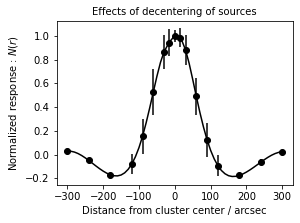

In [5]:
#fit to Mats simulations
#note very similar results for all spectral indexes *assuming* delta y_c does not get too large.
N_r=interpolate.CubicSpline(d0p7,-r0p7n)
dr=np.arange(-300,310,10)
diag_plot = True
if diag_plot:
    fig=pl.figure(figsize=(4.27,3.2))#pl.figure()
    #pl.errorbar(offs,respn,yerr=iqrn,label='alpha=-0.7',color='b',marker='o')
    #pl.errorbar(offs3p5,respn3p5,yerr=iqrn3p5,label='alpha=3.5',color='r',marker='o')
    pl.errorbar(d0p7,-r0p7n,yerr=i0p7n,label='alpha=-0.7',color='k',marker='o',linestyle='')
    pl.plot(dr,N_r(dr),c='k')
    #pl.errorbar(d3p5,r3p5n,yerr=i3p5n,label='alpha=3.5',color='r',marker='o')
    #pl.errorbar(d0p1,r0p1n,yerr=i0p1n,label='alpha=0.1',color='g',marker='o')
    #pl.legend()
    pl.title(r'Effects of decentering of sources',fontsize='medium')
    pl.xlabel(r'Distance from cluster center / arcsec')
    pl.ylabel(r'Normalized response : $N(r)$')
    fig.tight_layout()

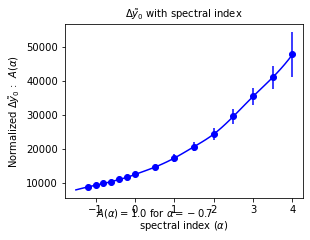

In [6]:
####alphas####
diag_plot = True

delta0=-0.08756e-4 #reference everything to 1mJy at alpha=0.7

alpha=np.unique(talpha['alpha'])
A=np.zeros(len(alpha))
Aiqr=np.zeros(len(alpha))
for i in range(len(alpha)):
    p=np.where((talpha['alpha'] == alpha[i]))
    A[i]=np.median(talpha['srcinj_fixed_y_c'][p]-talpha['fixed_y_c'][p])
    Aiqr[i]=stats.iqr((talpha['srcinj_fixed_y_c'][p]-talpha['fixed_y_c'][p]),rng=(16.,84.)) / 2.
A_alpha=interpolate.CubicSpline(alpha,A/delta0)
x=np.arange(-1.5,4.1,0.1)
if diag_plot:
    fig=pl.figure(figsize=(4.27,3.2))#pl.figure()
    pl.errorbar(alpha,A/delta0,yerr=Aiqr/delta0,marker='o',linestyle='',color='b')
    pl.plot(x,A_alpha(x),c='b')
    pl.title(r'$\Delta \tilde{y}_0$ with spectral index',fontsize='medium')
    pl.xlabel(r'spectral index ($\alpha$)')
    pl.ylabel(r'Normalized $\Delta \tilde{y}_0$ :  $A(\alpha)$')
    pl.text(-1,5,r'$A(\alpha) = 1.0$ for $\alpha=-0.7$')
#fig.tight_layout()

# Applying this to M2 psrcs

In [7]:
psrc = pd.read_csv("../psrc_lists/uncleaned_psrcs_sigma__2aspcmsubqm2_fitel_0f09-to-35f5Hz_qc_0p6rr_M_PdoCals_dt20_snr_iter1_4.0sigma.csv")
theta_1 = 3.0
theta_2 = 5.0
f_psrc = psrc.loc[(psrc["theta_1"]==theta_1)&(psrc["theta_2"]==theta_2)&(psrc["amp_snr"]>4.)]

matched = pd.read_csv("../psrc_lists/matched_12arcsec_1and2_best1_vlass.csv")
f_matched = matched.loc[(matched["theta_1"]==theta_1)&(matched["theta_2"]==theta_2)&(matched["amp_snr"]>4.0)]

In [8]:
delta_y0 = -8.76e10-6
fluxes_mJy_all = np.array(list(f_psrc["amp_fit"]))*1000 #mJy (Peak flux or integrated flux)
distances_all = np.array(list(f_psrc["dist_center_radians"]))*180/np.pi * 3600 #arcsecond
Del_y_all = fluxes_mJy_all * delta_y0 * N_r(distances_all) * A_alpha(-0.7)

fluxes_mJy_m = np.array(list(f_matched["amp_fit"]))*1000 #mJy (Peak flux or integrated flux)
distances_m = np.array(list(f_matched["dist_center_radians"]))*180/np.pi * 3600 #arcsecond
Del_y_m = fluxes_mJy_m * delta_y0 * N_r(distances_m) * A_alpha(-0.7)

In [9]:
f_matched["Del_y_m"] = Del_y_m
f_psrc["Del_y_m"] = Del_y_all

/var/folders/0f/q7p8w6jd62s3p62pwb9s_cbw0000gn/T/ipykernel_40223/1301067742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_matched["Del_y_m"] = Del_y_m
/var/folders/0f/q7p8w6jd62s3p62pwb9s_cbw0000gn/T/ipykernel_40223/1301067742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_psrc["Del_y_m"] = Del_y_all


In [10]:
out = f_matched[["cluster","amp_fit","Del_y_m"]]

(array([1., 1., 3., 2., 2., 2., 1., 9., 2., 3.]),
 array([-1.11116733e+15, -9.34870570e+14, -7.58573810e+14, -5.82277050e+14,
        -4.05980290e+14, -2.29683531e+14, -5.33867708e+13,  1.22909989e+14,
         2.99206749e+14,  4.75503508e+14,  6.51800268e+14]),
 <BarContainer object of 10 artists>)

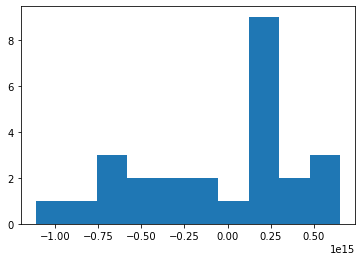

In [11]:
plt.hist(f_matched["Del_y_m"])

In [12]:
out.to_csv("del_y_per_cluster_only_matched_sources.csv")

In [13]:
out

,cluster,amp_fit,Del_y_m
5,ACT-CLJ0200.3+0019,0.001795,2.509092e+14
21,ACT-CLJ0201.6-0211,0.000929,-2.984714e+14
22,ACT-CLJ0201.6-0211,0.000731,-6.061032e+14
45,ACT-CLJ0204.5+0321,0.004346,6.518003e+14
70,ACT-CLJ0211.1-0453,0.001201,1.937285e+14
107,ACT-CLJ0220.9-0332,0.002076,1.608472e+14
127,ACT-CLJ0229.6-0336,0.002153,3.667078e+13
161,ACT-CLJ0246.4+0429,0.000599,-1.219633e+14
176,ACT-CLJ0248.0-0331,0.001438,-1.111167e+15
191,ACT-CLJ0248.3-0337,0.003984,5.790325e+14


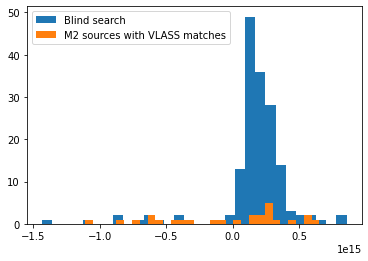

In [14]:
plt.hist(Del_y_all,bins=30,label="Blind search")
plt.hist(Del_y_m,bins=30,label="M2 sources with VLASS matches")
plt.legend()